>Hotel Reservation Cancellation Prediction

Anda adalah Data Scientist di sebuah perusahaan hotel. Anda diberikan dataset berisi informasi pemesanan kamar hotel (booking information) baik untuk hotel kota (city hotel) maupun hotel resort. 

Dataset ini juga mengandung kapan booking dilakukan, lama menginap, jumlah pengunjung dewasa, anak-anak, dan/atau bayi, serta ketersediaan tempat parkir.

## Library

Pertama-tama kita import library yang diperlukan untuk proses pengambilan data dan EDA.

In [124]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [241]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].

In [242]:
df = df[:5000]
df.shape

(5000, 32)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           5000 non-null   object 
 1   is_canceled                     5000 non-null   int64  
 2   lead_time                       5000 non-null   int64  
 3   arrival_date_year               5000 non-null   int64  
 4   arrival_date_month              5000 non-null   object 
 5   arrival_date_week_number        5000 non-null   int64  
 6   arrival_date_day_of_month       5000 non-null   int64  
 7   stays_in_weekend_nights         5000 non-null   int64  
 8   stays_in_week_nights            5000 non-null   int64  
 9   adults                          5000 non-null   int64  
 10  children                        5000 non-null   float64
 11  babies                          5000 non-null   int64  
 12  meal                            50

Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [243]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [246]:
df=df.drop(columns='hotel')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  5000 non-null   int64  
 1   adults                       5000 non-null   int64  
 2   children                     5000 non-null   float64
 3   babies                       5000 non-null   int64  
 4   meal                         5000 non-null   object 
 5   country                      4998 non-null   object 
 6   market_segment               5000 non-null   object 
 7   distribution_channel         5000 non-null   object 
 8   reserved_room_type           5000 non-null   object 
 9   booking_changes              5000 non-null   int64  
 10  deposit_type                 5000 non-null   object 
 11  days_in_waiting_list         5000 non-null   int64  
 12  customer_type                5000 non-null   object 
 13  required_car_parki

In [248]:
df.shape

(5000, 15)

In [ ]:
Dengan demikian, requirement batasan bahwa dataset yang akan diolah sudah memiliki:

>*Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].

>*Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

sudah terpenuhi. hotel di drop karena semua jenis variabelnya resort.

## A. EDA

Kemudian, Exploratory Data Analysis digunakan dengan tujuan untuk:

>*Memahami profil tamu/konsumen hotel (customer profiling).

>*Memahami kebiasaan tamu/konsumen hotel (customer behavior).

kita akan menggunakan visualisasi terhadap variabel variabel yang kiranya relevan untuk memahami 2 requirement tersebut.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [ ]:
Untuk memahami konteks variabel yang ada, digunakan sumber data dari kaggle yang diberikan. Berikut konteks untuk tiap Variabel yang ada:

 0   hotel                          : Hotel (H1 = Resort Hotel or H2 = City Hotel)                           
 1   is_canceled                    : Value indicating if the booking was canceled (1) or not (0)                     
 2   adults                         : Number of adults                           
 3   children                       : Number of children                        
 4   babies                         : Number of babies                           
 5   meal                           :Type of meal booked. 
                                    Categories are presented in standard hospitality mealpackages: 
                                    Undefined/SC – no meal package; BB – Bed & Breakfast; 
                                    HB – Half board (breakfast and one other meal – usually dinner);
                                    FB – Full board (breakfast, lunch and dinner)
                             
 6   country                        : Country of origin. Categories are represented in the ISO 3155–3:2013 format        
 7   market_segment                 : Market segment designation.
                                    In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                 

 8   distribution_channel           : Booking distribution channel. 
                                    The term “TA” means “Travel Agents” and “TO” means “Tour Operators”           

 9   reserved_room_type             : Code of room type reserved.
                                    Code is presented instead of designation for anonymity reasons.           

 10  booking_changes                : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation    

 11  deposit_type                   : Indication on if the customer made a deposit to guarantee the booking. 
                                    This variable can assume three categories: No Deposit – no deposit was made; 
                                    Non Refund – a deposit was made in the value of the total stay cost;
                                    Refundable – a deposit was made with a value under the total cost of stay. 

 12  days_in_waiting_list           : Number of days the booking was in the waiting list before it was confirmed to the customer.

 13  customer_type                  : Type of booking, assuming one of four categories:
                                    Contract - when the booking has an allotment or other type of contract associated to it;
                                    Group – when the booking is associated to a group;
                                    Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
                                    Transient-party – when the booking is transient, but is associated to at least other transient booking

 14  required_car_parking_spaces    : Number of car parking spaces required by the customer       
 15  total_of_special_requests      : Number of special requests made by the customer (e.g. twin bed or high floor)   

## Memahami profil tamu/konsumen hotel (customer profiling).

In [ ]:
Baru lah sekarang kita mulai mengeksplor data dari:

*Memahami profil tamu/konsumen hotel (customer profiling).

Dengan cara mengetahui siapa customer kita melihat dari asal negara dengan membandingkan identitas mereka dari jumlah:
- adult
- children
- babies

kemudian kita juga perlu tahu:
- market_segment
- distribution_channel

Untuk mengetahui sebenarnya mereka bisa kontak sampai di hotel ini melalui Travel Agents atau Tour Operators.

Disclaimer: karena data yang diminta dilimit sampai dengan 5000 data awal saja, menyebabkan semua pengunjung yang datang hanya ke Resort Hotel.Akan di drop nanti

### Melihat berdasarkan usia dengan negara asal.

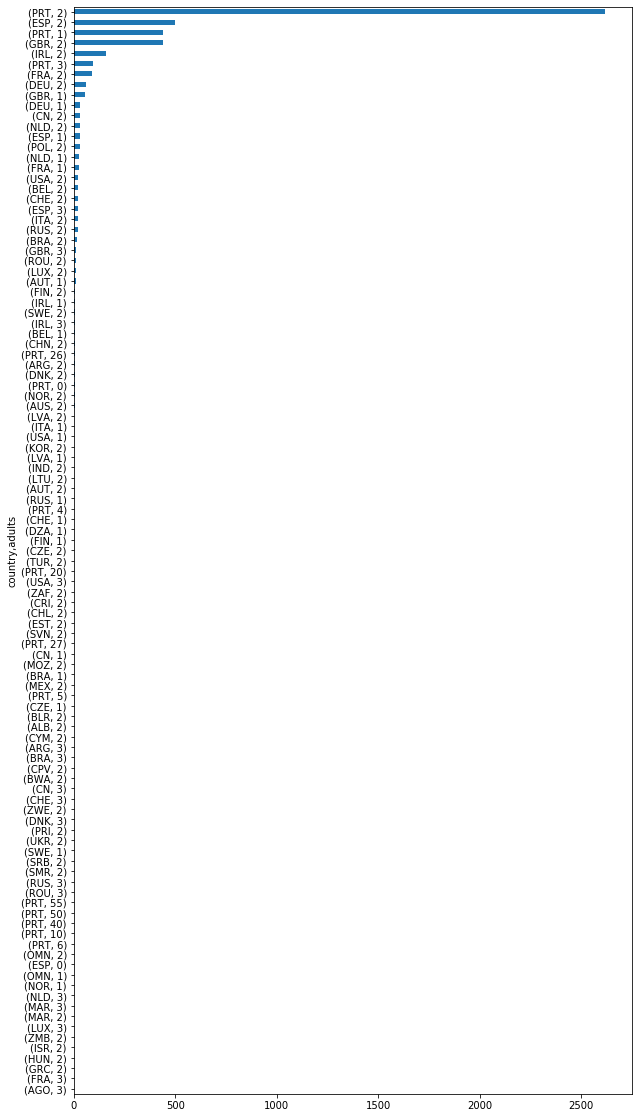

In [65]:
plt.figure(figsize=(10,20))
df.groupby('country')['adults'].value_counts().sort_values(ascending=True).plot(kind='barh')

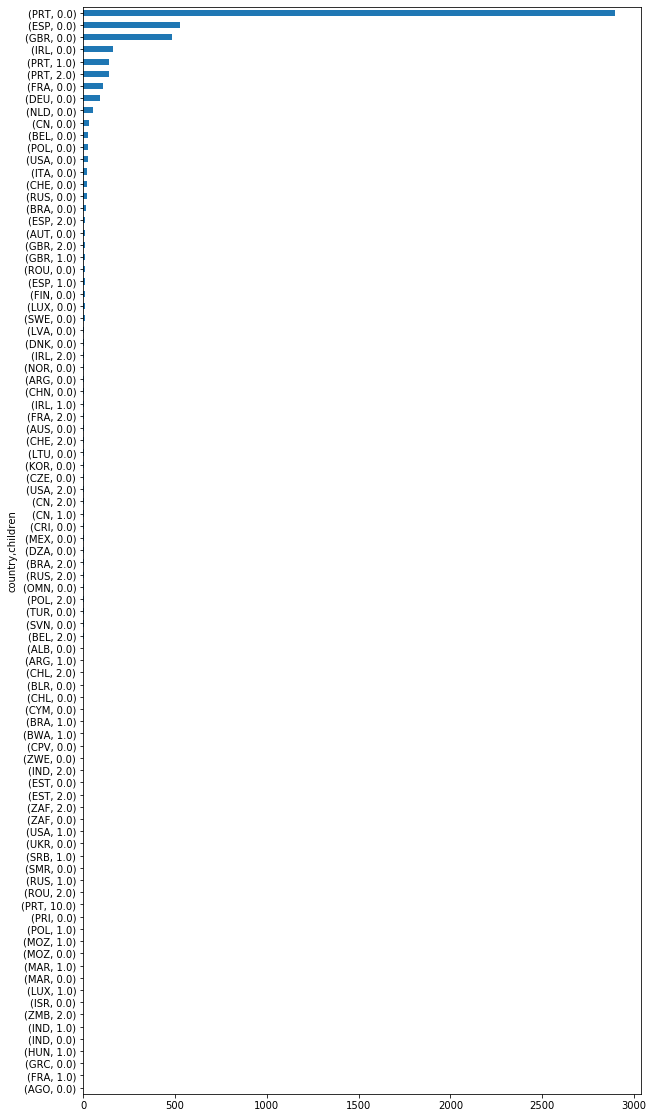

In [66]:
plt.figure(figsize=(10,20))
df.groupby('country')['children'].value_counts().sort_values(ascending=True).plot(kind='barh')

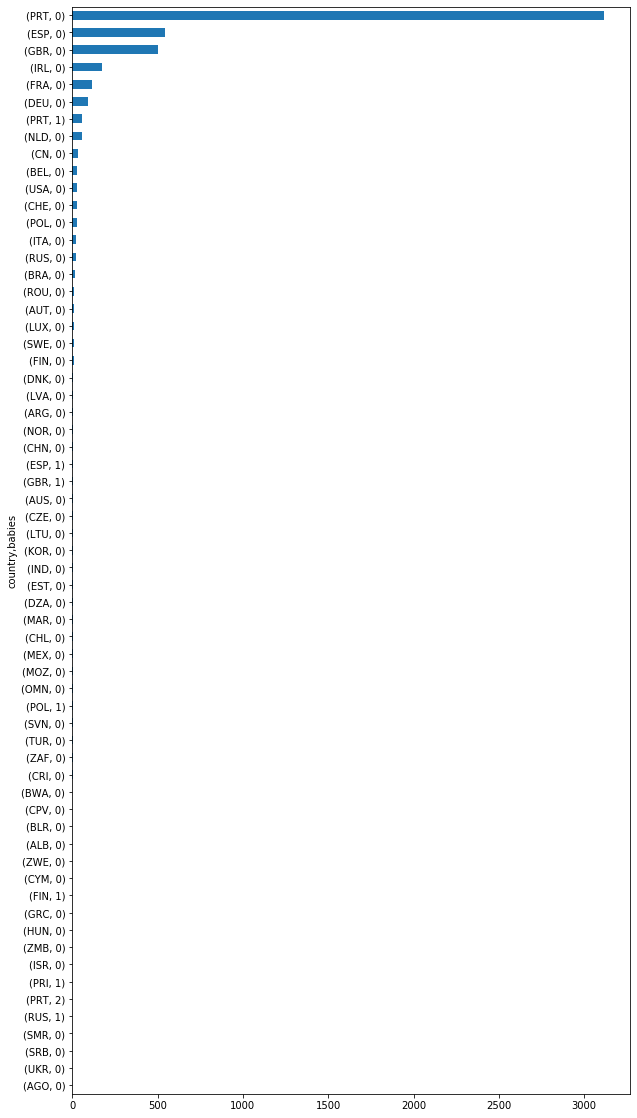

In [67]:
plt.figure(figsize=(10,20))
df.groupby('country')['babies'].value_counts().sort_values(ascending=True).plot(kind='barh')

### Berdasarkan pembookingan

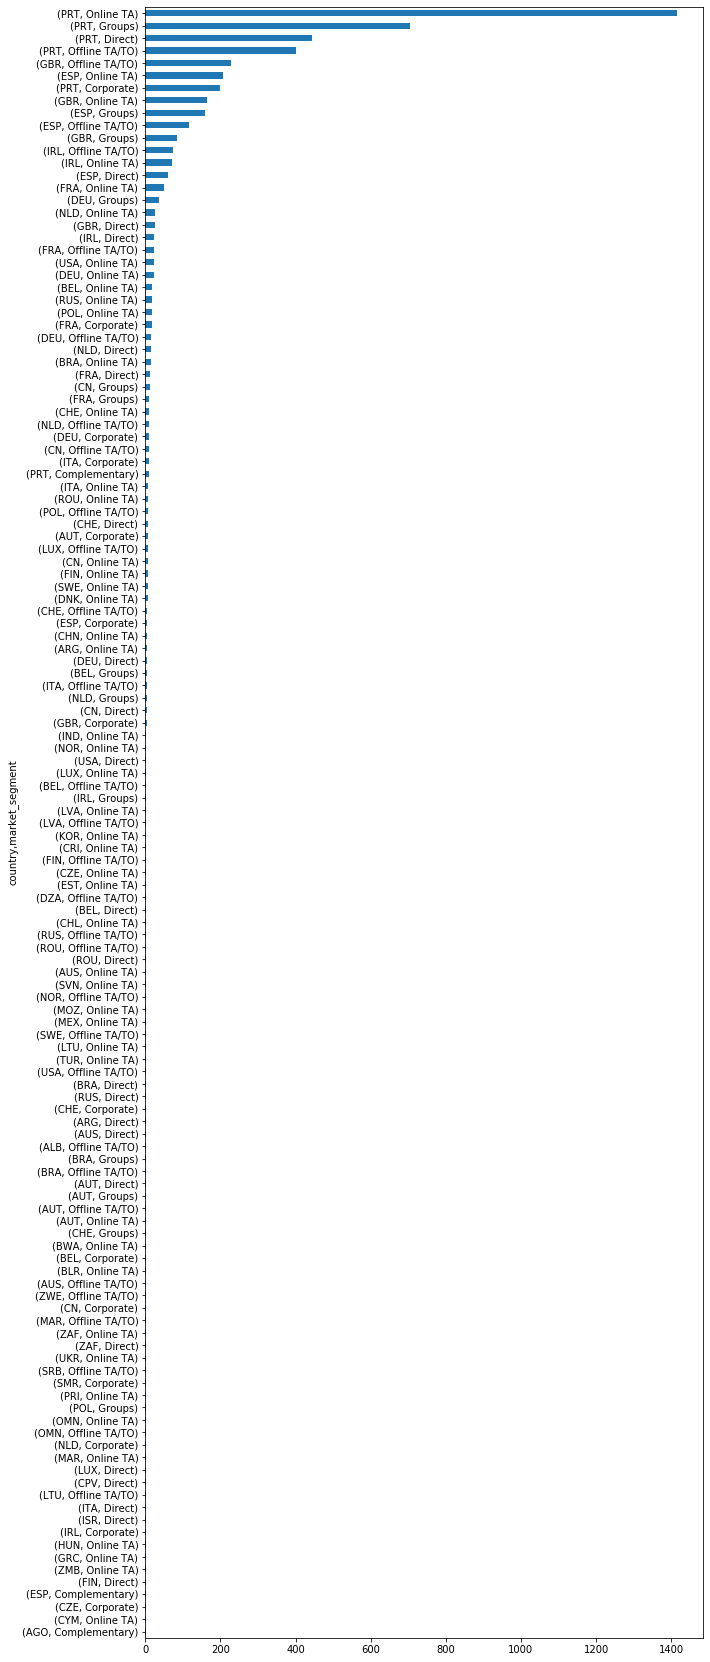

In [63]:
plt.figure(figsize=(10,30))
df.groupby('country')['market_segment'].value_counts().sort_values(ascending=True).plot(kind='barh')

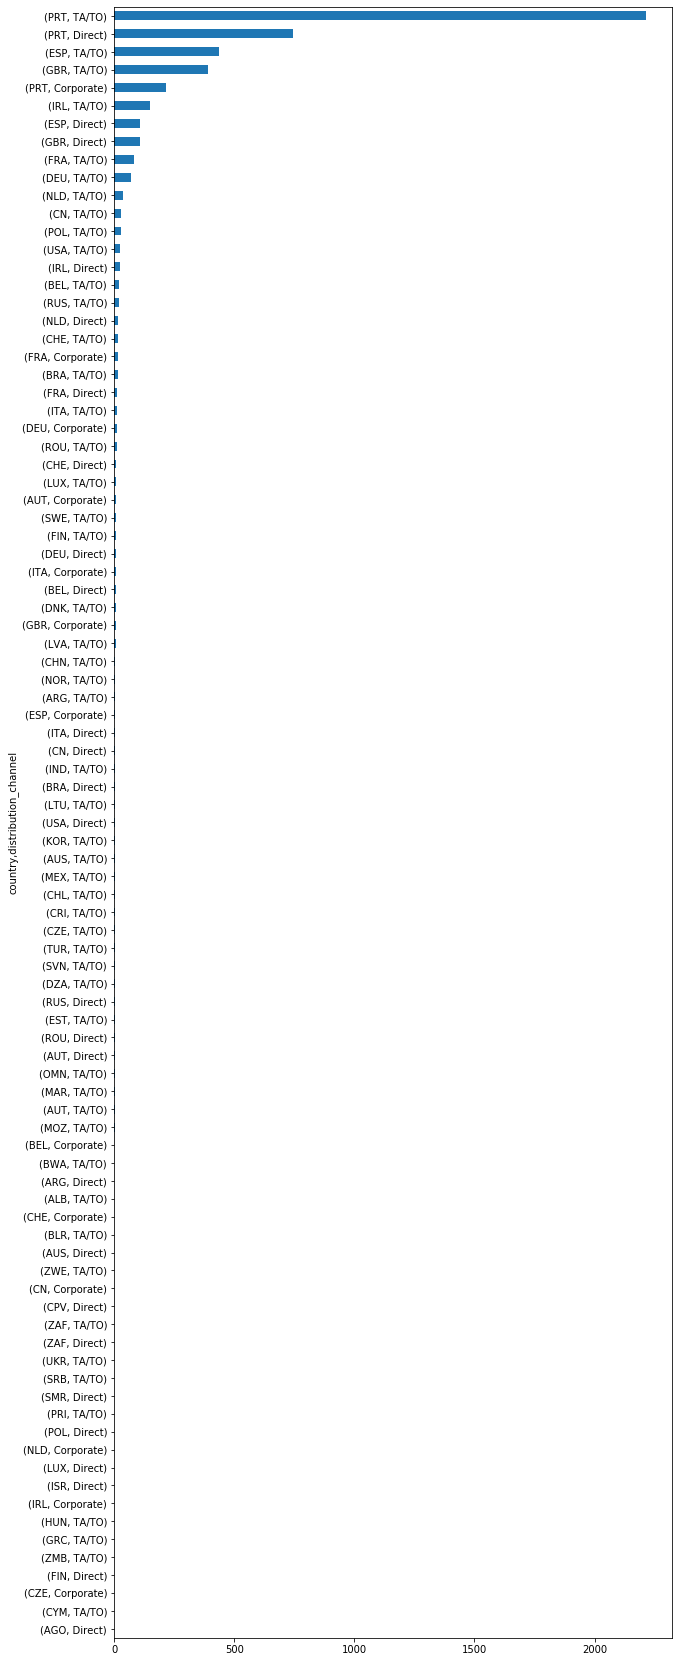

In [60]:
plt.figure(figsize=(10,30))
df.groupby('country')['distribution_channel'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Memahami kebiasaan tamu/konsumen hotel (customer behavior).

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [ ]:
Baru lah sekarang kita mulai mengeksplor data dari:

*Memahami kebiasaan tamu/konsumen hotel (customer behavior).

Kita akan melihat dari keputusan yang diambil oleh customer berdasarkan negara asal melalui variabel:

- meal
- reserved_room_type
- deposit_type
- customer_type
- total_of_special_requests

Untuk mengetahui sebenarnya habit customer berdasarkan pilihan mereka.

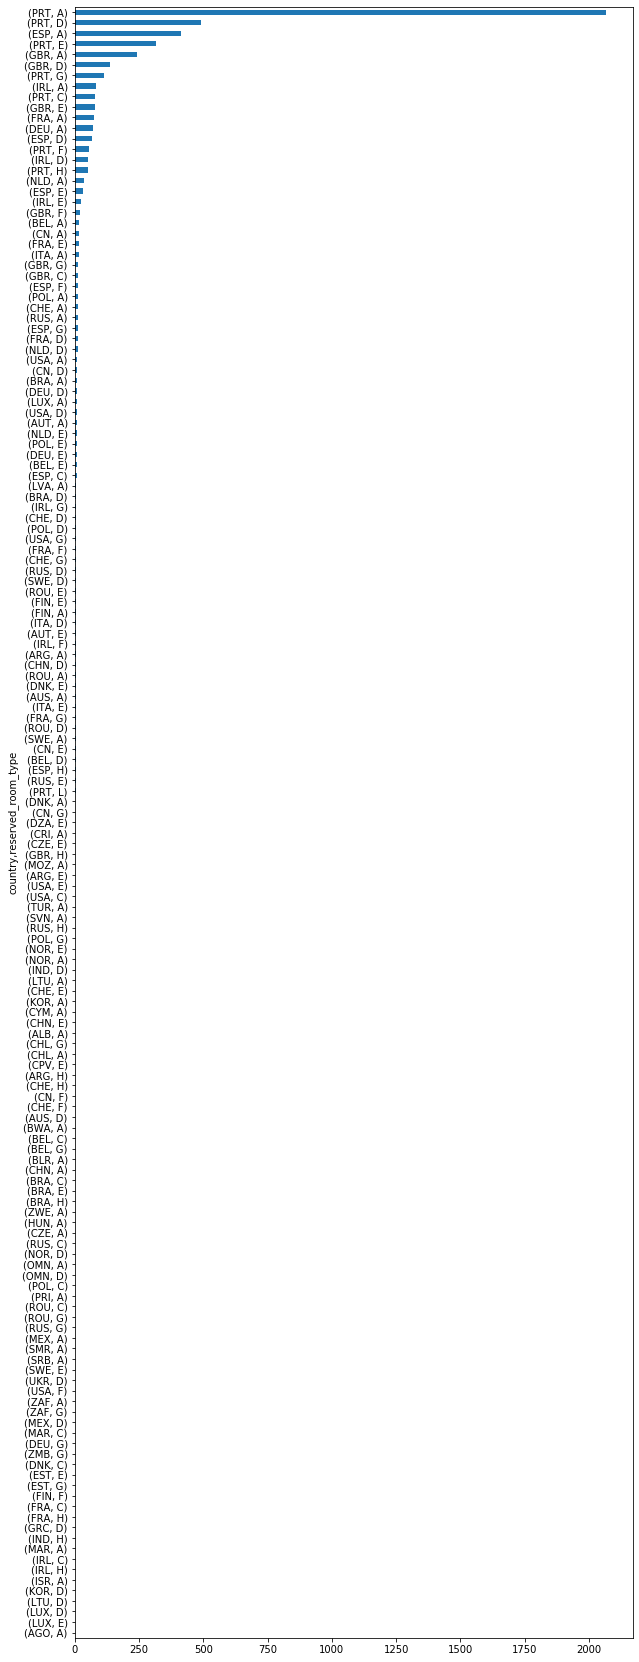

In [64]:
# Preferensi Room Type
plt.figure(figsize=(10,30))
df.groupby('country')['reserved_room_type'].value_counts().sort_values(ascending=True).plot(kind='barh')

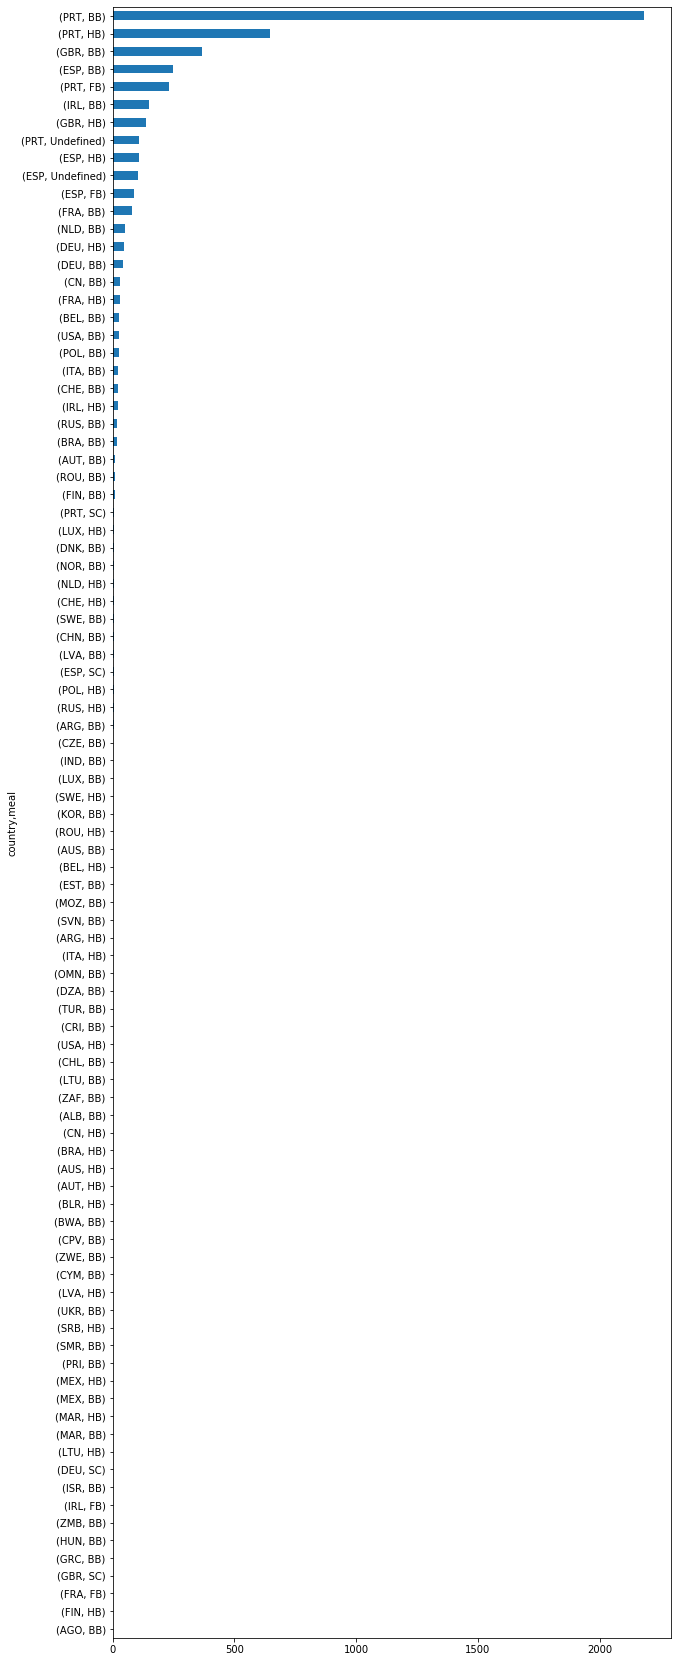

In [72]:
# Preferensi makanan
plt.figure(figsize=(10,30))
df.groupby('country')['meal'].value_counts().sort_values(ascending=True).plot(kind='barh')

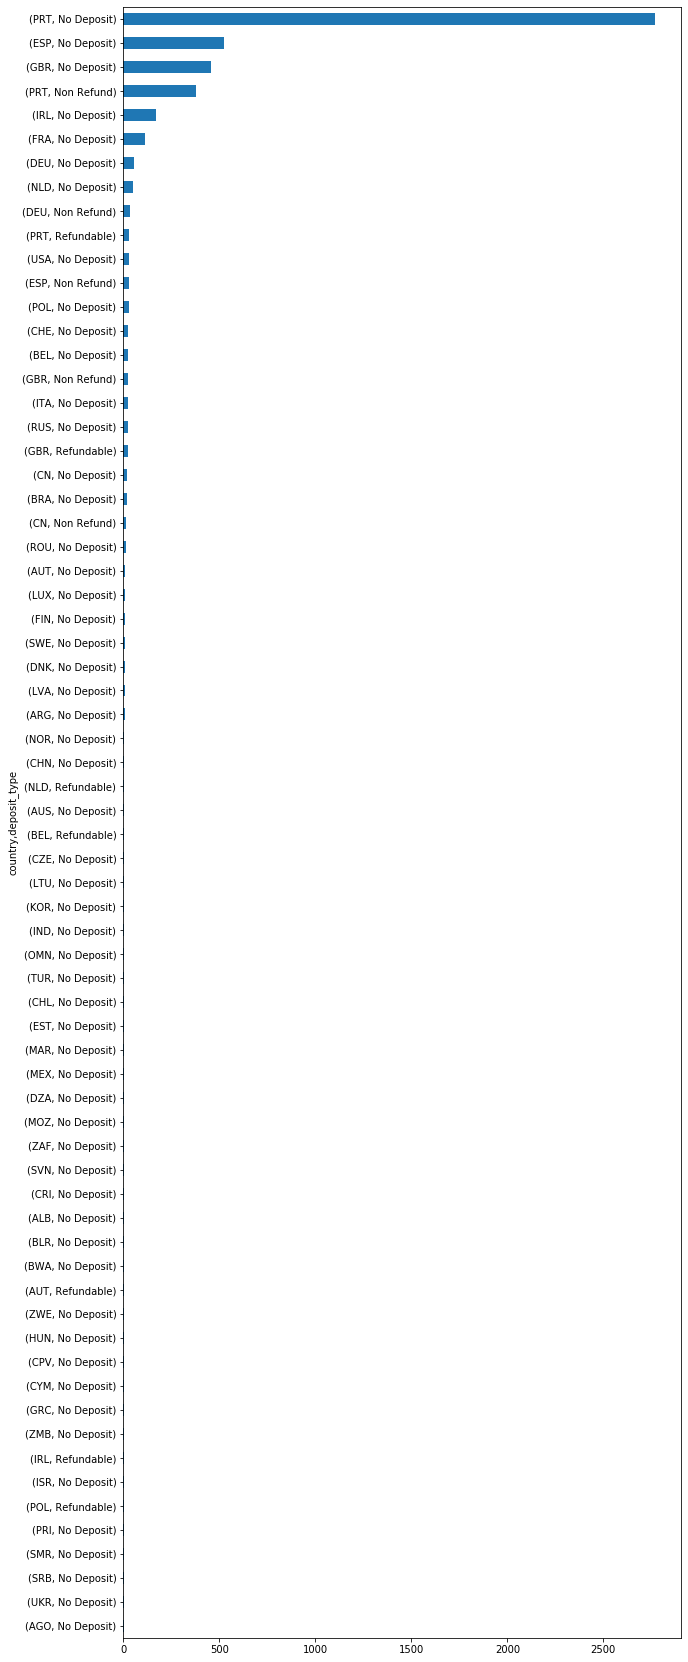

In [74]:
# Preferensi deposit type
plt.figure(figsize=(10,30))
df.groupby('country')['deposit_type'].value_counts().sort_values(ascending=True).plot(kind='barh')

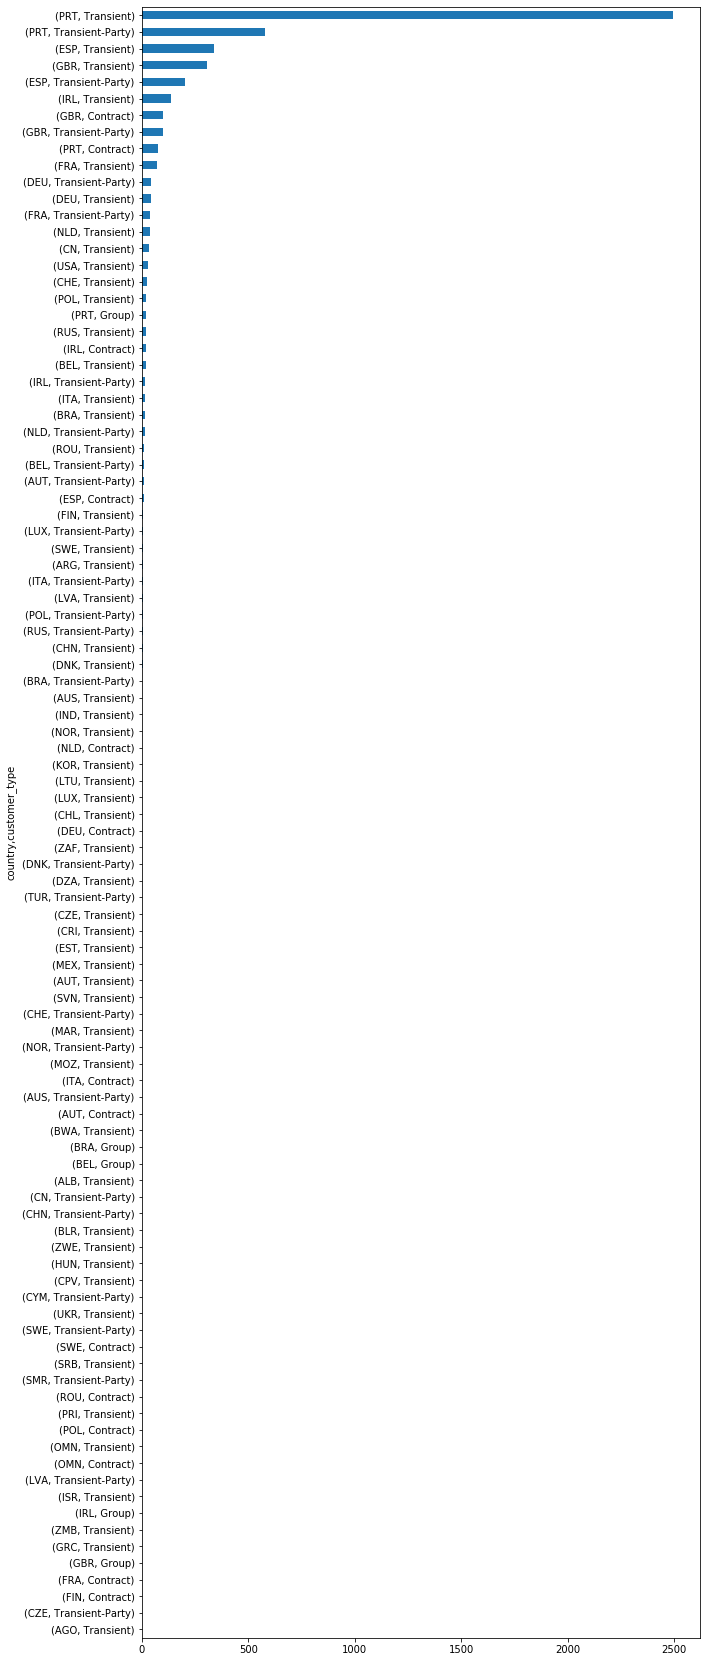

In [75]:
# customer type
plt.figure(figsize=(10,30))
df.groupby('country')['customer_type'].value_counts().sort_values(ascending=True).plot(kind='barh')

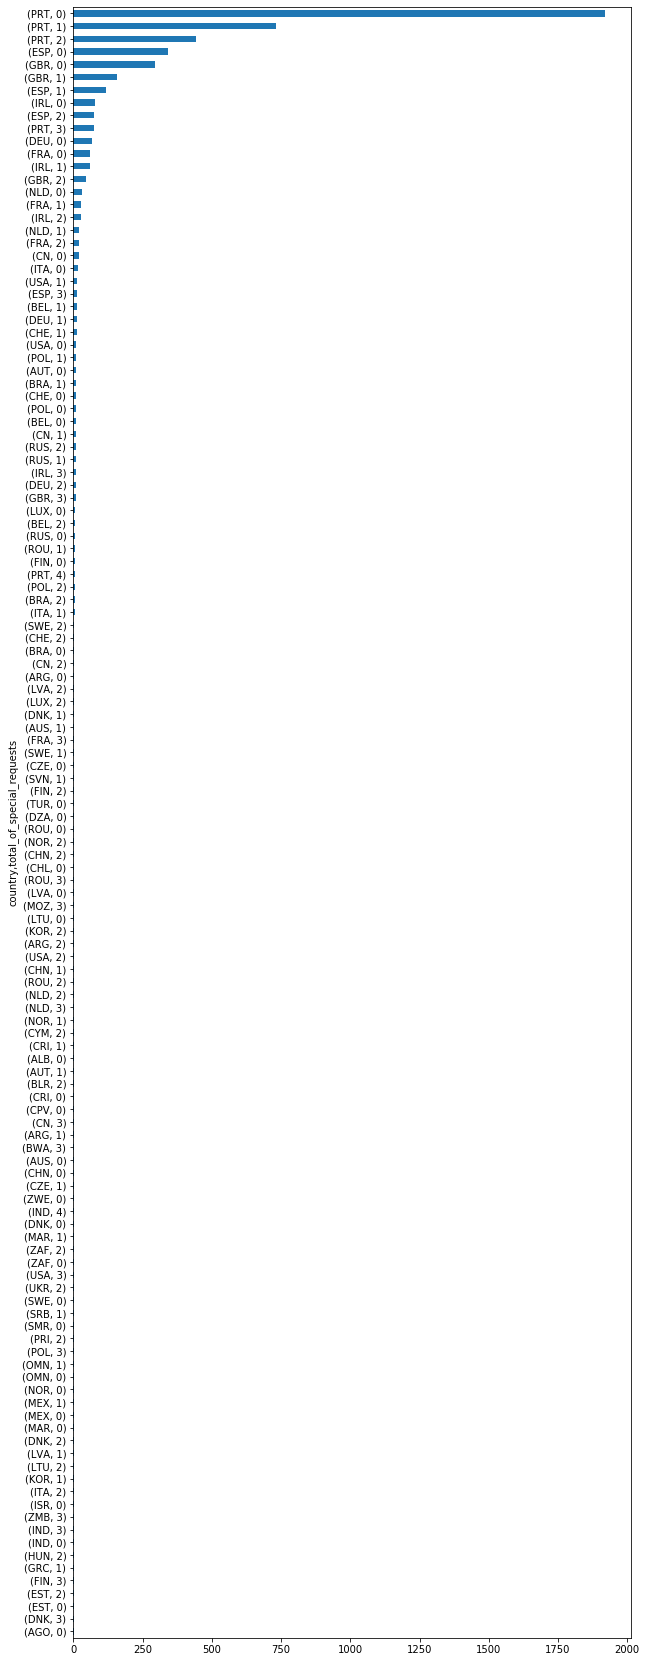

In [76]:
# special request type
plt.figure(figsize=(10,30))
df.groupby('country')['total_of_special_requests'].value_counts().sort_values(ascending=True).plot(kind='barh')

## EDA Summary

In [ ]:
Dengan demikian, sekarang kita bisa membuat kesimpulan dari EDA tadi dengan menjawab 2 pertanyaan tadi:

### Memahami profil tamu/konsumen hotel (customer profiling):

- 3 pengunjung paling besar adalah Portugal, Spanyol dan Inggris.

- Pengunjung yang paling umum datang ke resort hotelnya umumnya dari Portugal dan umumnya mereka datang berdua. Spanyoldan Inggris juga suka datang berdua.

- Umumnya pengunjung yang datang tidak membawa anak, mungkin yang datang sebagai couple yang belum punya anak. Pun yang membawa anak biasanya dari Portugal dengan membawa 1 atau 2 anak. Begitu pun dengan bayi, tidak terlalu banyak yang membawa bayi.

- Para pengunjung umumnya menggunakan Travel Agent secara online sebagai referensi utama untuk ke hotelnya.

### Memahami kebiasaan tamu/konsumen hotel (customer behavior):

- Metode deposit yang paling umum adalah non deposit

- Umumnya pengunjung membooking secara transient.

- apabila ada special request umumnya diminta oleh orang dari portugal, karena pengunjung portugal pun yang paling banyak dibanding dari negara lain.

- Bed and breakfast adalah tipe makanan yang paling banyak dikonsumsi oleh customer.

Kesimpulan: ada baiknya meningkatkan dana untuk promosi melalu travel agent di Portugal agar orang portugal lebih berminat untuk datang dan ada baiknya mencatat apa biasanya special request dari orang Portugal agar jauh lebih siap apabila ada request yang sama. Stok dan kualitas produk makanan ada baiknya difokuskan di Bed & Breakfast karena itu yang paling diminati oleh pengunjung.

## B. Data Cleaning & Preprocessing

In [ ]:
Karena tujuan ML ini adalah memperkirakan pembatalan pesanan atau tidak, maka ML yang akan diaplikasikan adalah Classification model.

Pertama kita melihat apakah ada missing value yang ada di data ini, di bawah bisa terlihat bahwa data yang hilang hanya berasal dari country saja sebanyak 0.04 persen.

In [249]:
df.isna().sum()/df.shape[0]*100

is_canceled                    0.00
adults                         0.00
children                       0.00
babies                         0.00
meal                           0.00
country                        0.04
market_segment                 0.00
distribution_channel           0.00
reserved_room_type             0.00
booking_changes                0.00
deposit_type                   0.00
days_in_waiting_list           0.00
customer_type                  0.00
required_car_parking_spaces    0.00
total_of_special_requests      0.00
dtype: float64

In [ ]:
Karena target data kita adalah is_canceled karena kita ingin memperkirakan mana yang akan cancel ato tidak, maka kita lihat apakah data target timpang atau tidak

In [250]:
df['is_canceled'].value_counts()/df.shape[0]*100

0    54.04
1    45.96
Name: is_canceled, dtype: float64

In [ ]:
Diliat dari data di atas, kita dapat berkesimpulan bahwa persebaran data canceled ato tidaknya cukup balance sehingga tidak perlu menyeimbangkan data dengan imbalance classfication method.

In [ ]:
kemudian kita ubah juga data children menjadi integer bukan float

In [251]:
df['children']=df['children'].astype(int)

In [ ]:
Sekarang kita akan melakukan preprocessing yaitu mengubah data categorical / object menjadi angka agar bisa dibaca oleh machine learning

tahap preprocessing:
* Data Splitting
* encoding (meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,is_canceled-->target data)

* Putuskan jenis encoding mana yang sesuai untuk tiap feature
    >* meal--> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* country--> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* market_segment--> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* distribution_channel --> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* reserved_room_type --> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* deposit_type --> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak
    >* customer_type --> Binary karena datanya categorical tapi tidak berurutan, dan jumlahnya banyak

* isi missing value di country dengan most frequent

## Library Preprocessing

In [252]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [280]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary encoder', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('binary encoder', binary_encoder_pipeline,['meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']),
], remainder='passthrough')

In [ ]:
Kode di atas merupakan perpanjangan dari tahapan encoding untuk merubah data object

## Splitting Data

In [ ]:
Kemudian, kita memisahkan atau splot data untuk data train dan data test.

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
df['children']=df['children'].astype(int)
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y, # kita gunakan stratify y walaupun tidak terlalu jomplang data targetnya untuk jaga-jaga
    random_state=2020
)

## C. Model Benchmark & Evaluation Metric 

In [ ]:
Pilihlah setidaknya 3 model machine learning yang Anda pahami, untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan cancel booking atau tidak! Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

## Library Model Benchmark

In [257]:
from sklearn.linear_model import LogisticRegression # Untuk Mencari probability/success rate terjadinya sesuatu
from sklearn.tree import DecisionTreeClassifier # mengapilkasikan perbandingan terjadinya sesuatu dengan kondisi if/else
from sklearn.ensemble import RandomForestClassifier # kita memilih secara acak kandidat fitur yang akan digunakan dalam setiap splitting tree untuk mendapatkan model yang lebih stabil dan menghindari overfitting

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
a. Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda!

canceled berarti 1 dan tidak canceled adalah 0

kesalahan yang paling berpengaruh adalah kedua kasus tersebut yaitu:

False Positive = "Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan."

False Negative = "Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan)."


In [ ]:
 b. Pilih evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!

 Kedua kasus tersebut, False Negative dan False Positive, sangat mempengaruhi kerugian Hotel. 
 
 Dalam kasus False Positive, pihak hotel akan membuat pelanggan marah dan tidak dihargai karena ketika sudah pesan, tapi dianggap cancel. Apabila pelanggan marah, bisa saja dia membuat isu ini viral di sosial media dan menjadi topik trending yang mencoreng nama pihak hotel. Untuk melakukan damage control dari piha Public Relation akan makan waktu dan uang yang cukup banyak.

 Dalam kasus False Negative, pihak hotel akan mengeluarkan usaha dan uang yang ekstra untuk menyambut customer yang akan datang walau sebenarnya mereka tidak datang.

 maka dari itu, evaluation metric yang cocok adalah f1 score karena kita ingin meminimalisir kasus false positve dan false negative yang akan terjadi dalam model ini.

In [ ]:
di bawah menggunakan fungsi untuk mentransform data X dan y train menggunakan transformer dan tiap model akan dievaluasi f1 score dan f1 standard deviation nya

In [284]:
def evaluate(df,model):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name,model in model:
        model=model
        estimator=Pipeline([('preprocess',transformer),('model',model)])

        skfold= StratifiedKFold(n_splits=5) # splittin data jadi 5

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1').mean())
        f1_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1').std())

    return pd.DataFrame({
        'model': model_name,
        'f1_score': f1_score,
        'f1_std': f1_std
        })

In [285]:
models=[
    ['Log Regression', LogisticRegression()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()],
]

In [286]:
evaluate(df,models)

,model,f1_score,f1_std
0,Log Regression,0.855816,0.008350
1,Decision Tree,0.850279,0.013033
2,Random Forest,0.861317,0.009270


In [ ]:
Berdasarkan data di atas, meskipun Random Forest Classifier terlihat yang paling bagus walau beda tipis dengan yang lain walau logistic regression meiliki standard deviation paling kecil walau tipis. Dibawah akan dilakukan benchmark lagi.

In [287]:
model=RandomForestClassifier()

estimator=Pipeline([('preprocess',transformer),('model',model)])

estimator.fit(X_train,y_train)
f1_score(y_test,estimator.predict(X_test))

0.8508863399374349

## Hyperparameter Tuning

In [288]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
SEBELUM HYPERPARAMATER TUNING

In [303]:
model=RandomForestClassifier()

estimator=Pipeline([('preprocess',transformer),('model',model)])

skfold= StratifiedKFold(n_splits=5)

In [304]:
# randomforest

# Number of trees in random forest
n_estimators = [2,5,10,15,20]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,20,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5,10,15,20,50]
# Method of selecting samples for training each tree
bootstrap = [True, False]

hyperparam_space_rf = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
Disini akan menggunakan Randomized search dengan tujuan untuk menyesuaikan kemampuan komputer yang dimiliki mengetahui grid search dan menggunakan fungsi n_jobs akan memberatkan komputer.

In [305]:
random_rf = RandomizedSearchCV(
    estimator, 
    param_distributions= hyperparam_space_rf,
    cv = skfold,
    scoring= 'f1',
)

In [306]:
random_rf.fit(X_train,y_train)

ValueError: Invalid parameter n_estimators for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('model', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.